# Connectance and overall migration success

This notebook is used to plot the relation of connectance and overall migration success to the maximum dispersal distance in the range from 0 to 1. The values are plottet immediately after initialisation for 10 random geometric graphs.

In [1]:
# load needed packages
import numpy as np
import spatial_eco_evo_functions_random as fct_rgg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# set ecological parameter values:
gamma_A = 0.2            # interaction benefit provided by the pollinator
gamma_P = 1              # interaction benefit provided by the pollinator
c_A = 1                  # intraspecific competition strength of the pollinator 
s = 2.5                  # trade-off shape form factor

# dispersal rate
d = 0.2

# initial pollinator growth rate
r_Aorig = 0.6            # for comparison with non-spatial model
r_A0 = r_Aorig + d

# parameter for environmental change
r_A_change = -0.000008   # change of r_A per time step

# parameters for evolution
t_interval = 20           # length of time interval between mutations
t_step = 1                # one data point per time step
mut_step = 0.02           # maximum mutation step size

# extinction threshold
A_ext = 0.0001

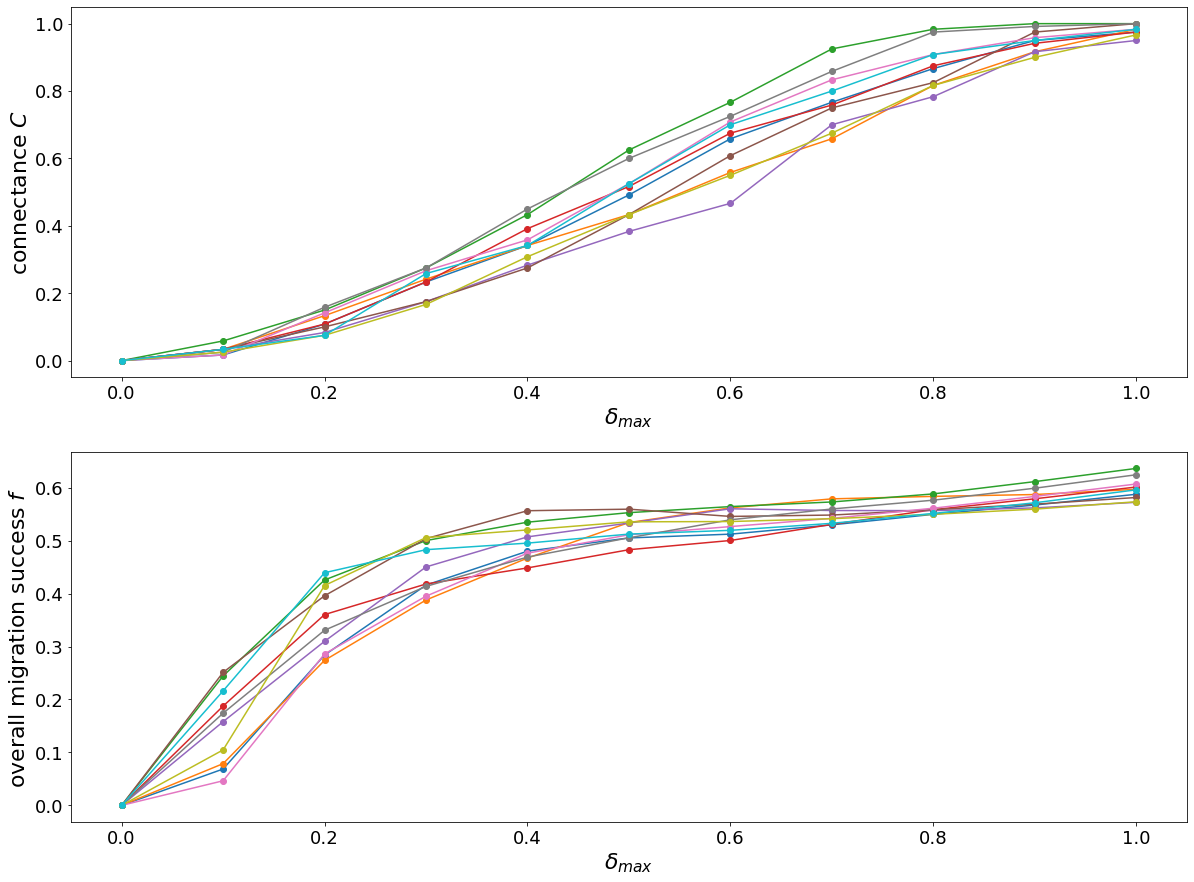

In [3]:
delta_max_vals = np.arange(0, 1.1, 0.1)
N = 16
h = 0 # degree of heterogeneity
c_P_vals = fct_rgg.c_P_values(N, h)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,15))

pad = 5 # in points

for i in range(10):
    # set up landscape
    x_coord, y_coord, delta = fct_rgg.landscape_random(N)
    connect_tot = []
    f_tot = []

    for delta_max in delta_max_vals:
        x_tot = []
        success = fct_rgg.linkwise_success(delta, delta_max)
        fractions = fct_rgg.fractions_ij(success)
        mig_matrix = success * fractions
        
        ############ connectance
        connect = fct_rgg.connectance(N, success)
        connect_tot.append(connect)
        
        ############ migration success 
        x, alpha_max_vals, alpha_r_vals, alpha_m_vals = fct_rgg.initialisation(c_P_vals, c_A, gamma_P, gamma_A, 
                                                                               s, d, r_A0, r_A_change, N, mig_matrix, 0.02)
        x_tot.append(x)
        x_tot = np.asarray(x_tot)

        f = fct_rgg.overall_migration_success(x_tot, d, mig_matrix, N)
        f_tot.append(f)

    im = axes[0].plot(delta_max_vals, connect_tot, '-o')
    im = axes[1].plot(delta_max_vals, f_tot, '-o')
    
axes[0].set_ylabel("connectance $C$", fontsize=22)
axes[0].set_xlabel("$\delta_{max}$", fontsize=22)
axes[1].set_ylabel("overall migration success $f$", fontsize=22)
axes[1].set_xlabel("$\delta_{max}$", fontsize=22)
axes[0].tick_params(axis='both', labelsize=18)
axes[1].tick_params(axis='both', labelsize=18)